# Web page phishing detection using machine learning !


* Importing the necessary libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

* Importing dataset CSV file

In [5]:
# a function that takes input csv file path and returns X and Y
#load dataframe

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df


In [6]:
df = load_data('data/dataset_phishing.csv')
df.head()



,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [8]:
df.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [9]:
df.shape

(11430, 89)

In [10]:
#drop duplicates
df = df.drop_duplicates()
df.shape
#no duplicates found

(11430, 89)

In [11]:
#drop nulls
df =df.dropna()
df.shape

(11430, 89)

In [12]:
#check for nulls
df.isnull().sum()


url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

So there is no null value in the dataset.

<Figure size 432x288 with 0 Axes>

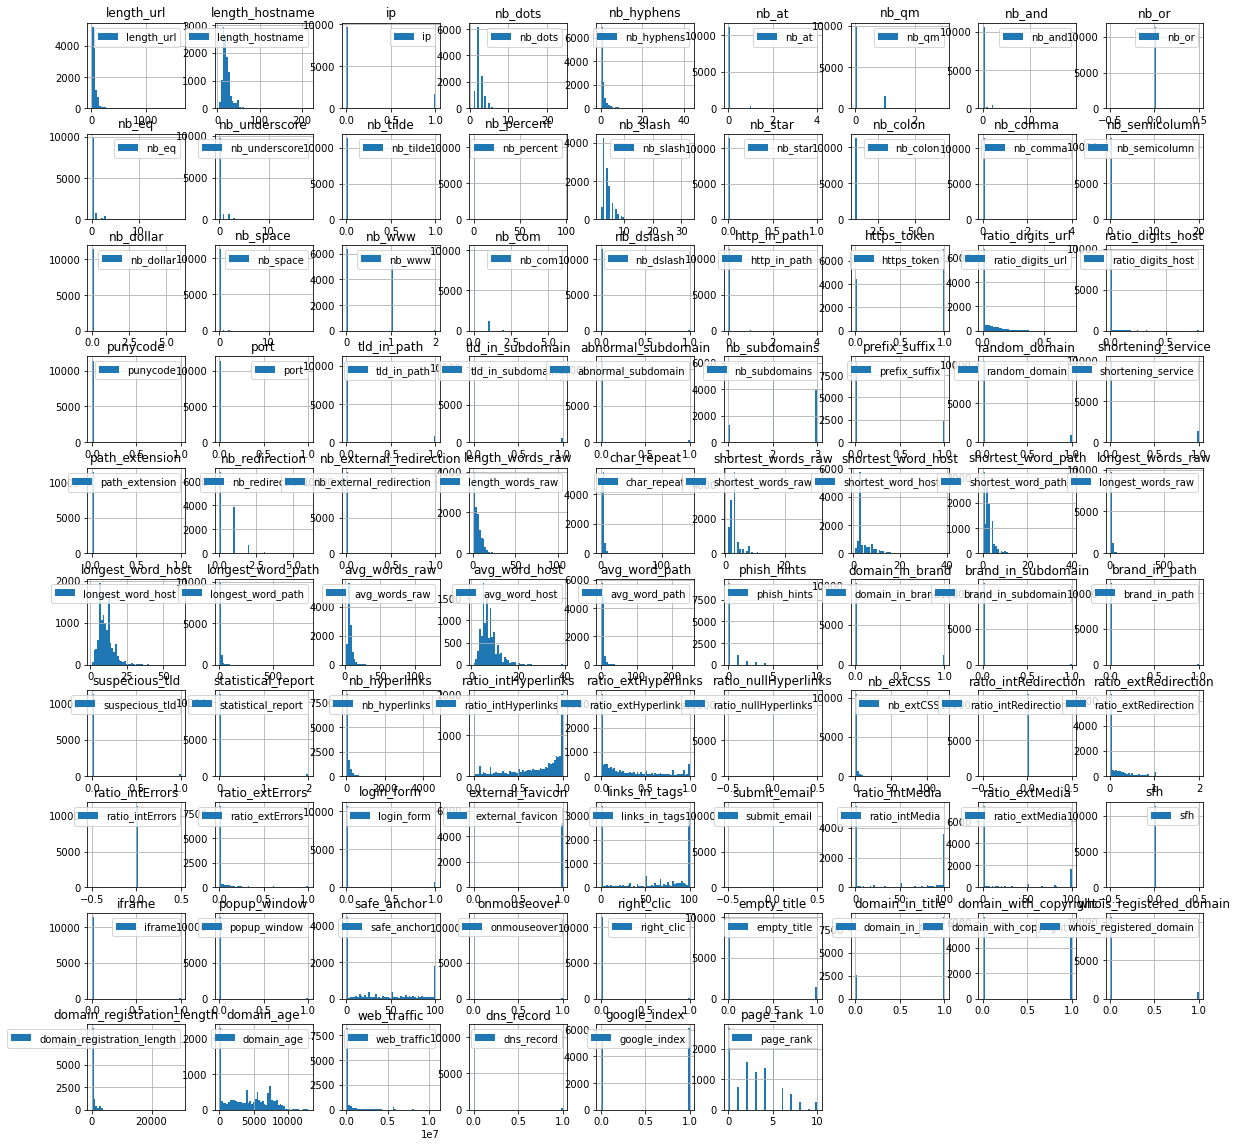

In [13]:
# #data visualization
# #add space between the subplots
plt.subplots_adjust(wspace = 0.8, hspace = 0.8)
#space between axes and title
# plt.tight_layout()
#plot histograms of the data
rand_colors_list = []
df.hist(bins=50, figsize=(20,20), legend=True)
plt.show()


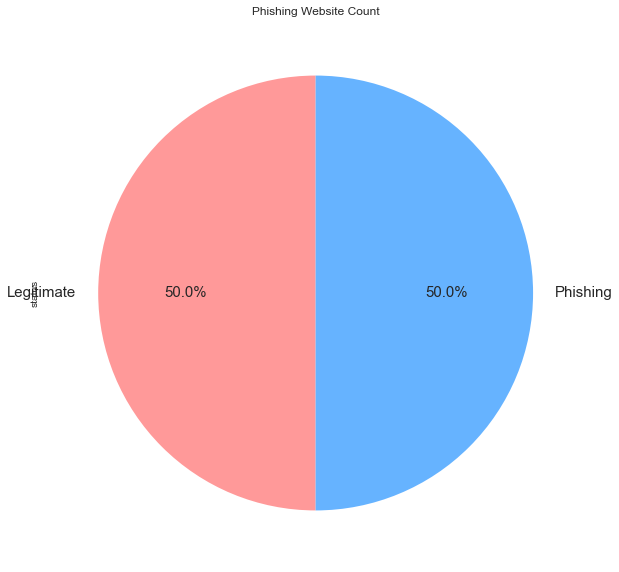

In [14]:
# Now we visualize the output variable
#pie chart
#white background
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
df['status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,  colors=['#ff9999','#66b3ff'], labels=['Legitimate', 'Phishing'], fontsize=15)
plt.title('Phishing Website Count')
plt.show()


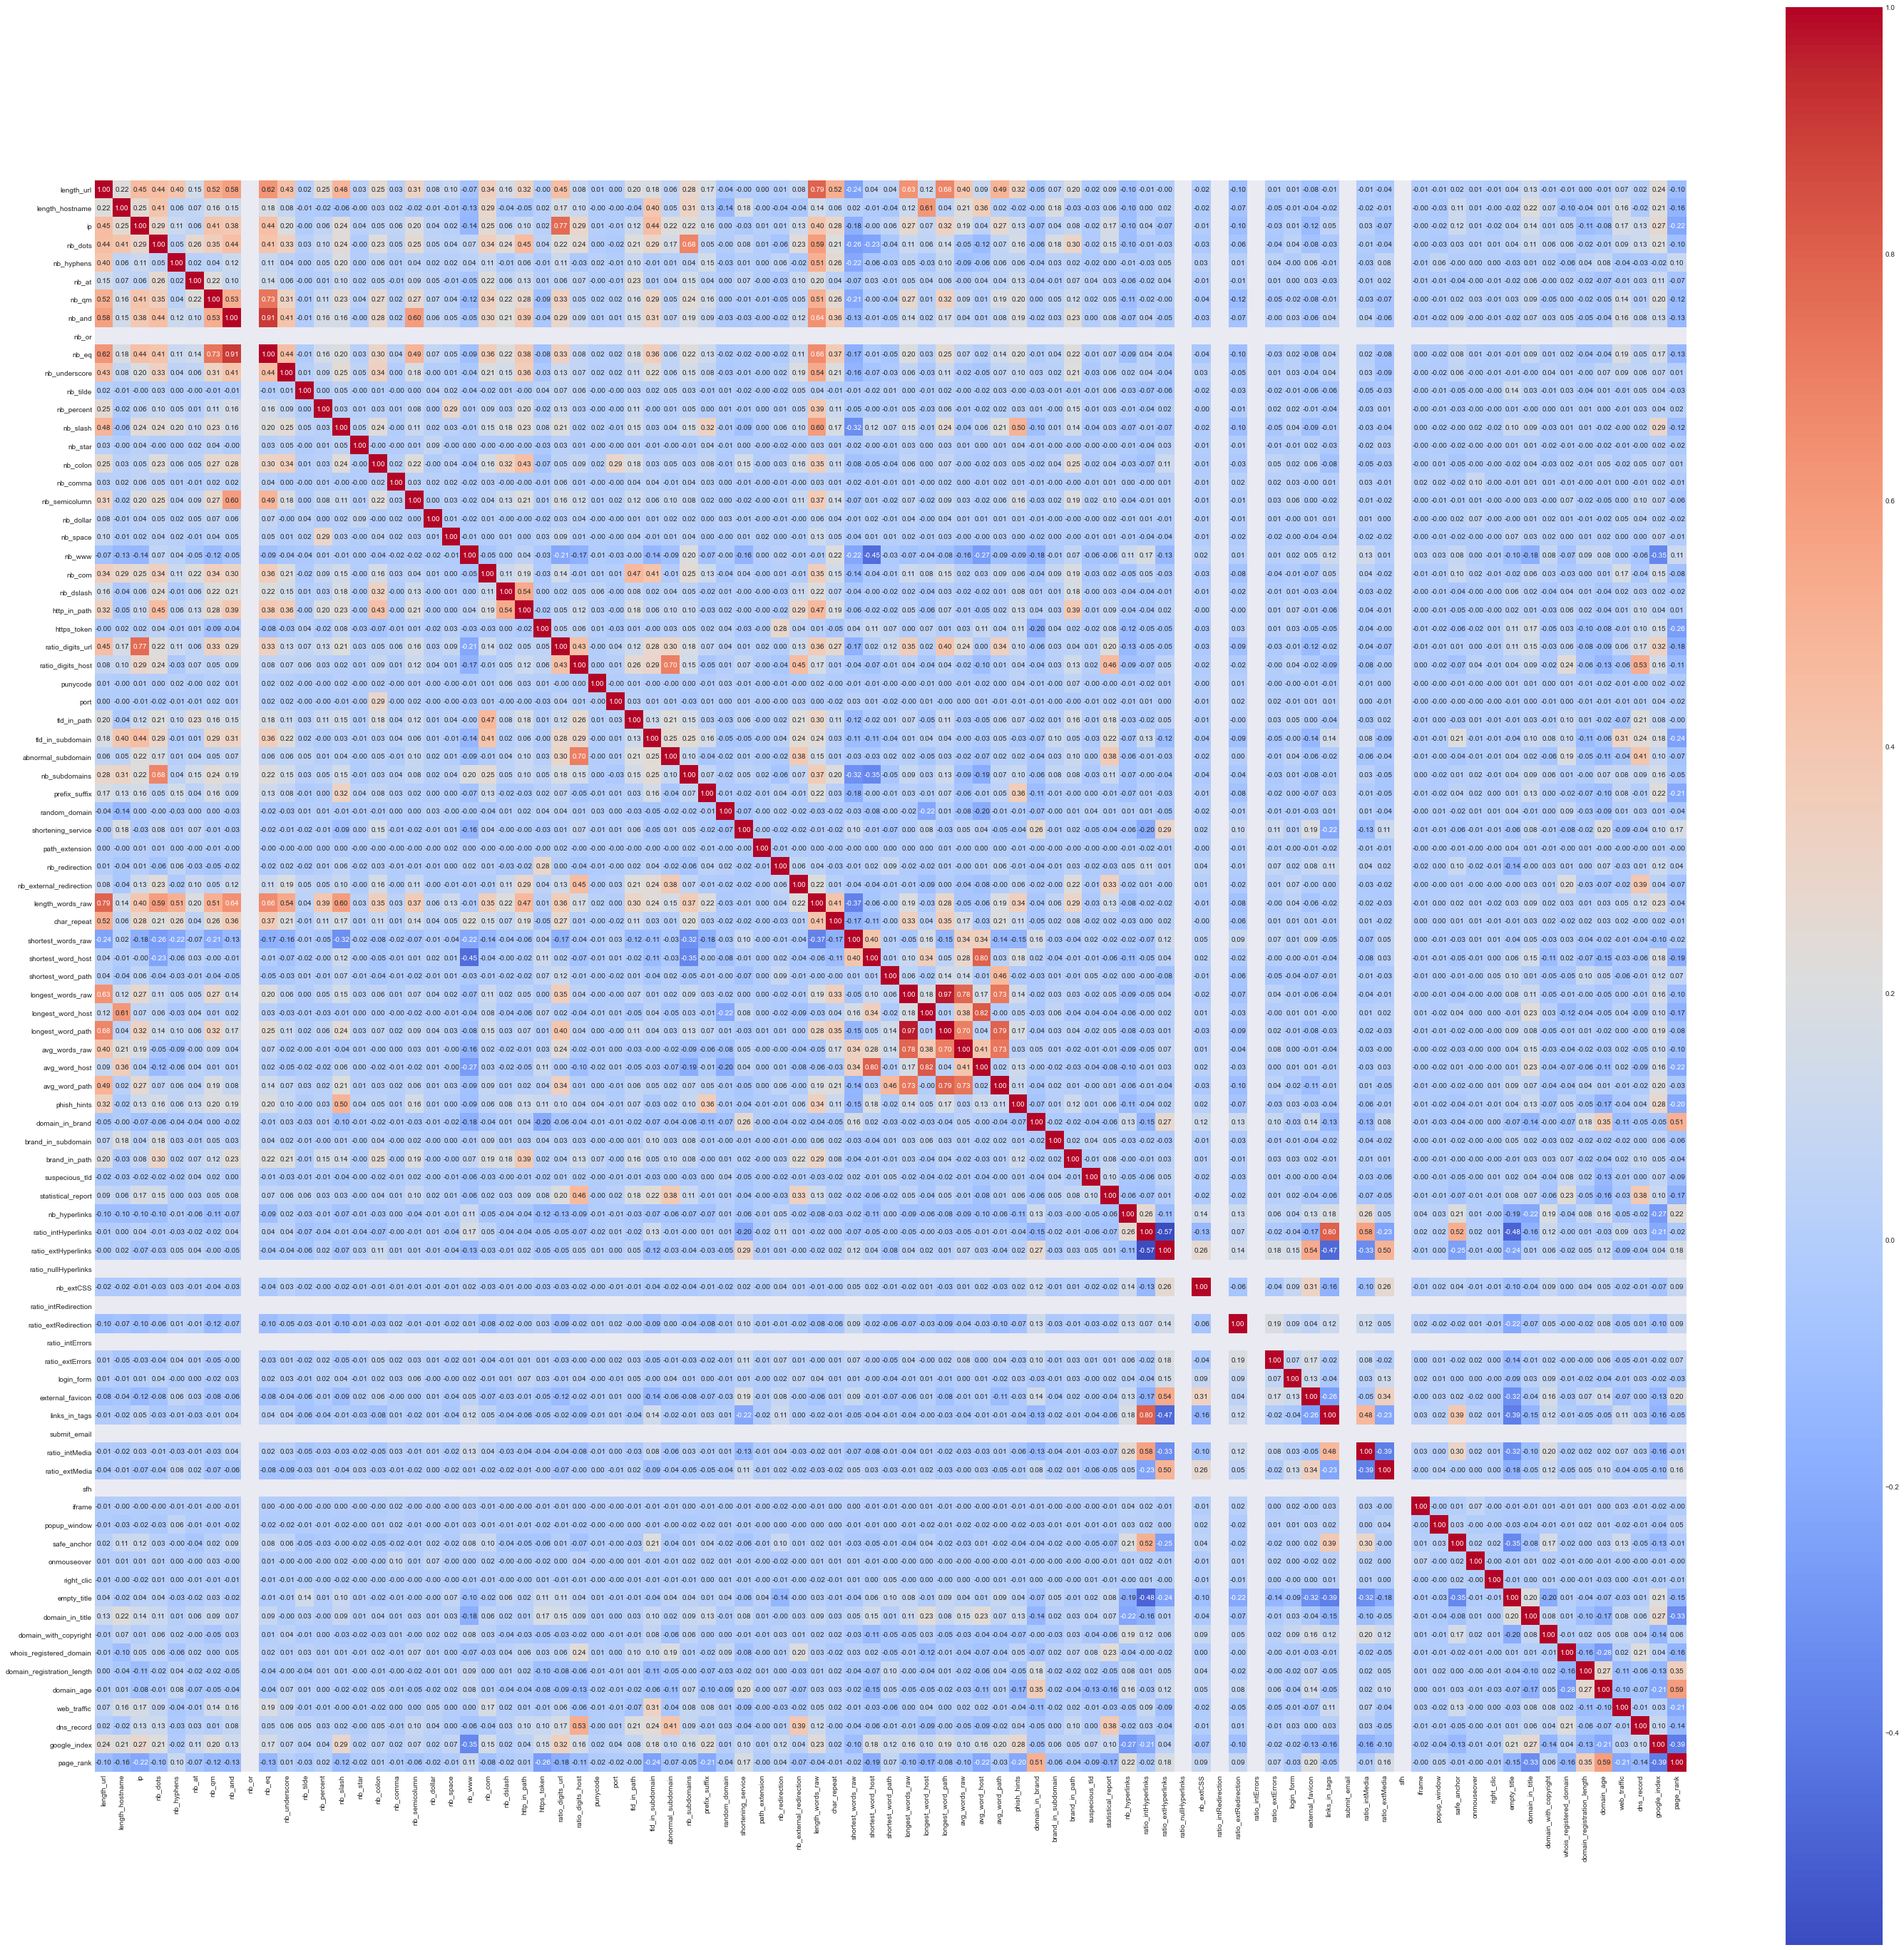

In [15]:
# #corr matrix
corr_matrix = df.corr()
# #heatmap

plt.figure(figsize=(50,50))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True , square=True, fmt='.2f')
plt.show()

In [16]:
# Check some random samples
random_samples = df.sample(5)
# expand the output to see all columns
pd.set_option('display.max_columns', None)
random_samples



,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
10120,http://totalrar.com/total-manager.html,38,12,0,2,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,0,0,4,0,4,8,4,8,8,7,6.00,8.0,5.333333,0,0,0,0,0,0,17,0.705882,0.294118,0,0,0,1.000000,0,0.00000,0,0,0.000000,0,0.000000,0.000000,0,0,0,68.750000,0,0,0,1,0,0,146,2411,0,0,0,2,legitimate
6375,https://www.adtbusiness.com/,28,19,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,0,0,2,4,3,3,0,11,11,0,7.00,7.0,0.000000,0,0,0,0,0,0,130,0.846154,0.153846,0,1,0,0.200000,0,0.10000,0,1,87.500000,0,98.039216,1.960784,0,0,0,65.116279,0,0,0,1,1,0,21,5093,0,0,0,3,legitimate
3920,http://portals.clevelandclinic.org/exploreacar...,92,27,0,3,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1,0.043478,0.0,0,0,0,0,0,3,0,0,0,0,2,0,8,1,4,7,4,18,15,18,9.25,11.0,8.666667,0,0,0,0,0,0,122,0.918033,0.081967,0,0,0,0.400000,0,0.10000,0,0,87.500000,0,100.000000,0.000000,0,0,0,42.857143,0,0,0,1,1,0,168,8232,3883,0,1,5,legitimate
10321,https://www.beskydy.cz/Content/default.aspx,43,14,0,3,0,0,0,0,0,0,0,0,0,4,0,1,0,0,0,0,1,0,0,0,0,0.000000,0.0,0,0,0,0,0,3,0,1,0,0,0,0,5,3,3,3,4,7,7,7,5.60,5.0,6.000000,1,0,0,0,0,0,244,0.913934,0.086066,0,0,0,0.238095,0,0.00000,0,0,100.000000,0,61.111111,38.888889,0,0,0,56.250000,0,0,0,0,0,0,221,6863,2044997,0,0,3,legitimate
2241,http://www.iptvultra.com/,25,17,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,1,0,0,1,0,2,3,3,3,0,9,9,0,6.00,6.0,0.000000,0,0,0,0,0,0,96,0.354167,0.645833,0,3,0,0.161290,0,0.16129,1,1,27.272727,0,2.325581,97.674419,0,0,0,33.333333,0,0,0,0,1,0,329,1496,1337125,0,0,2,legitimate


In [17]:
#check for class count
df['status'].value_counts()


phishing      5715
legitimate    5715
Name: status, dtype: int64

so we have balanced dataset.

In [18]:
#checking for outliers
#boxplot
plt.figure(figsize=(200,100))
df.boxplot()
#zoom in
#name the plot : after scaling
plt.title('Before Scaling')
#add legend with labels
plt.show()


Some important notes from the box plot are:
1. The feature : "web_traffic" has a lot of outliers.=> to solve this we can use log transformation.
2. Features ranges are different.=> to solve this we can use standardization.

Also , looks like the features needs scaling.
:)


## Data Preprocessing

In [19]:
# data preprocessing
#1. We have to convert the categorical data into numerical data

# category = df.select_dtypes(include=['object']).columns
## the only categorical data is the class column and the url column
# we will convert the class column to numerical data
#by mapping the values : 1 for phishing and 0 for legitimate
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
print(df['status'].value_counts())
df['status'].head()


0    5715
1    5715
Name: status, dtype: int64


0    0
1    1
2    1
3    0
4    0
Name: status, dtype: int64

In [20]:
#the url column is not useful for the model so we will drop it
df = df.drop('url', axis=1)
df.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,3,0,0,0,0,0,0,4,4,3,3,3,11,11,6,5.750000,7.0,4.500000,0,0,0,0,0,0,17,0.529412,0.470588,0,0,0,0.875000,0,0.500000,0,0,80.000000,0,100.000000,0.000000,0,0,0,0.0,0,0,0,0,1,0,45,-1,0,1,1,4,0
1,77,23,1,1,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,0,0,0,0,1,0.220779,0.0,0,0,0,0,0,1,0,0,0,0,1,0,4,4,2,19,2,32,19,32,15.750000,19.0,14.666667,0,0,0,0,0,0,30,0.966667,0.033333,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,80.000000,20.000000,0,0,0,100.0,0,0,0,1,0,0,77,5767,0,0,1,2,1
2,126,50,1,4,1,0,1,2,0,3,2,0,0,5,0,1,0,0,0,0,0,1,0,0,0,0.150794,0.0,0,0,0,1,0,3,1,0,0,0,1,0,12,2,2,3,2,17,13,17,8.250000,8.4,8.142857,0,0,0,0,0,0,4,1.000000,0.000000,0,0,0,0.000000,0,0.000000,0,0,100.000000,0,0.000000,0.000000,0,0,0,100.0,0,0,0,1,0,0,14,4004,5828815,0,1,0,1
3,18,11,0,2,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,1,0,5,5,0,5,5,0,5.000000,5.0,0.000000,0,0,0,0,0,0,149,0.973154,0.026846,0,0,0,0.250000,0,0.250000,0,0,100.000000,0,96.428571,3.571429,0,0,0,62.5,0,0,0,1,0,0,62,-1,107721,0,0,3,0
4,55,15,0,2,2,0,0,0,0,0,0,0,0,5,0,1,0,0,0,0,1,0,0,0,1,0.000000,0.0,0,0,0,0,0,2,0,0,0,0,1,0,6,3,3,3,4,11,7,11,6.333333,5.0,7.000000,0,0,0,0,0,0,102,0.470588,0.529412,0,0,0,0.537037,0,0.018519,1,0,76.470588,0,0.000000,100.000000,0,0,0,0.0,0,0,0,0,1,0,224,8175,8725,0,0,6,0


Scaling the features using StandardScaler.

In [21]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,nb_underscore,nb_tilde,nb_percent,nb_slash,nb_star,nb_colon,nb_comma,nb_semicolumn,nb_dollar,nb_space,nb_www,nb_com,nb_dslash,http_in_path,https_token,ratio_digits_url,ratio_digits_host,punycode,port,tld_in_path,tld_in_subdomain,abnormal_subdomain,nb_subdomains,prefix_suffix,random_domain,shortening_service,path_extension,nb_redirection,nb_external_redirection,length_words_raw,char_repeat,shortest_words_raw,shortest_word_host,shortest_word_path,longest_words_raw,longest_word_host,longest_word_path,avg_words_raw,avg_word_host,avg_word_path,phish_hints,domain_in_brand,brand_in_subdomain,brand_in_path,suspecious_tld,statistical_report,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_nullHyperlinks,nb_extCSS,ratio_intRedirection,ratio_extRedirection,ratio_intErrors,ratio_extErrors,login_form,external_favicon,links_in_tags,submit_email,ratio_intMedia,ratio_extMedia,sfh,iframe,popup_window,safe_anchor,onmouseover,right_clic,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,-0.436327,-0.193964,-0.421020,0.379116,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,-0.295128,-0.081815,-0.083946,-0.685161,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,1.098907,-0.337729,-0.081271,-0.098673,0.798018,-0.594651,-0.267868,-0.01871,-0.04866,-0.264999,-0.229732,-0.148617,1.206090,-0.503825,-0.301425,-0.375276,-0.013229,-0.720143,-0.05621,-0.400711,0.224909,-0.057562,-0.512450,0.200505,-0.198974,0.107876,-0.197666,-0.363968,-0.189497,-0.082894,-0.388973,-0.341057,-0.064257,-0.070168,-0.13514,-0.180392,-0.420926,-0.194034,0.605943,0.0,-0.284507,0.0,2.687711,0.0,2.801064,-0.260624,-0.890315,0.674877,0.0,1.235290,-0.605350,0.0,-0.03625,-0.077932,-0.948614,-0.033744,-0.03744,-0.377549,-1.860473,1.129194,-0.28037,-0.549299,-1.307594,-0.429340,6.978227,0.934264,0.320974,-1.0
1,0.287067,0.177207,2.375182,-1.081136,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,-0.295128,-0.081815,-0.083946,0.377443,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,-0.893559,-0.337729,-0.081271,-0.098673,0.798018,1.876053,-0.267868,-0.01871,-0.04866,-0.264999,-0.229732,-0.148617,-1.933425,-0.503825,-0.301425,-0.375276,-0.013229,0.725201,-0.05621,-0.400711,0.224909,-0.509749,3.547014,-0.133086,0.751998,1.730002,0.929003,2.048202,3.164071,1.339666,-0.388973,-0.341057,-0.064257,-0.070168,-0.13514,-0.180392,-0.342965,0.967464,-0.760717,0.0,-0.284507,0.0,-0.596511,0.0,-0.399922,-0.260624,-0.890315,1.156557,0.0,0.802838,-0.084312,0.0,-0.03625,-0.077932,1.610785,-0.033744,-0.03744,-0.377549,0.537498,-0.885587,-0.28037,-0.510022,0.548471,-0.429340,-0.143303,0.934264,-0.467407,1.0
2,1.173224,2.682613,2.375182,1.109242,0.001174,-0.142915,2.356473,2.237556,0.0,2.711505,1.534217,-0.081815,-0.083946,0.377443,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,-0.893559,2.300854,-0.081271,-0.098673,-1.253105,1.092856,-0.267868,-0.01871,-0.04866,-0.264999,4.352889,-0.148617,1.206090,1.984817,-0.301425,-0.375276,-0.013229,0.725201,-0.05621,1.035010,-0.194490,-0.509749,-0.512450,-0.133086,0.072732,0.513407,0.279002,0.239075,0.201752,0.426829,-0.388973,-0.341057,-0.064257,-0.070168,-0.13514,-0.180392,-0.498886,1.056008,-0.864902,0.0,-0.284507,0.0,-0.596511,0.0,-0.399922,-0.260624,-0.890315,1.156557,0.0,-0.926971,-0.605350,0.0,-0.03625,-0.077932,1.610785,-0.033744,-0.03744,-0.377549,0.537498,-0.885587,-0.28037,-0.587348,-0.018839,2.491612,-0.143303,0.934264,-1.255788,1.0
3,-0.779940,-0.936306,-0.421020,-0.351010,-0.477984,-0.142915,-0.387464,-0.197604,0.0,-0.293683,-0.295128,-0.081815,-0.083946,-1.216463,-0.026465,-0.116135,-0.038984,-0.104139,-0.024962,-0.092717,-0.893559,-0.337729,-0.081271,-0.098673,0.798018,-0.594651,-0.267868,-0.01871,-0.04866,-0.264999,-0.229732,-0.148617,-0.363667,-0.503825,-0.301425,-0.375276,-0.013229,0.725201,-0.056

In [22]:
#fix the web_traffic column values
#we will use the median value to replace the negative values
median = df_scaled['web_traffic'].median()
df_scaled['web_traffic'] = df_scaled['web_traffic'].apply(lambda x: median if x < 0 else x)
df_scaled['web_traffic'].describe()

count    11430.000000
mean        -0.026456
std          1.007931
min         -0.428513
25%         -0.428513
50%         -0.428513
75%         -0.428513
max          4.966743
Name: web_traffic, dtype: float64

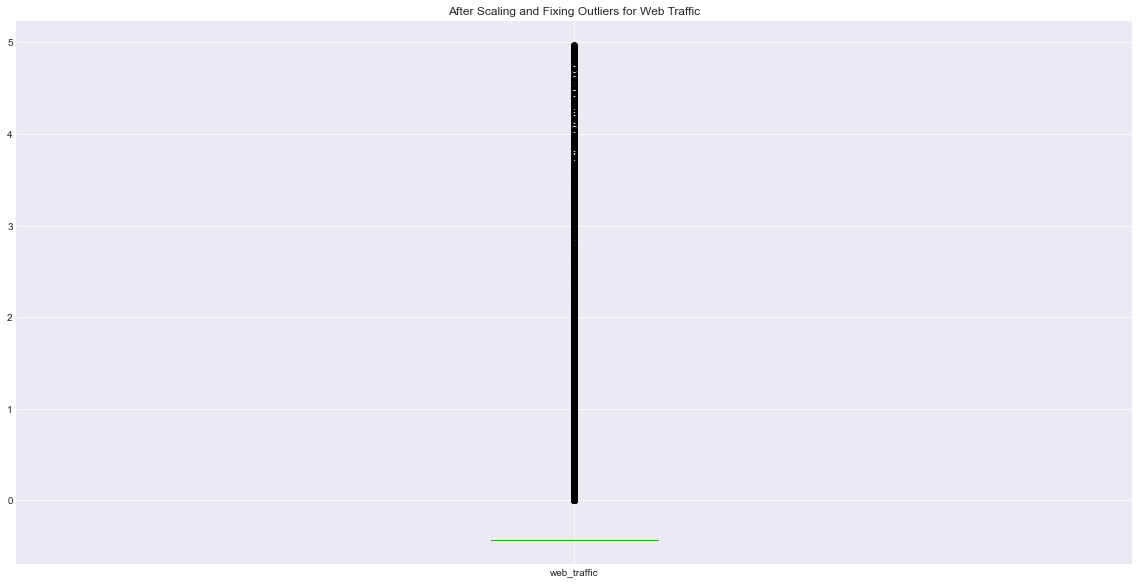

In [23]:
# Boxplot for web_traffic column
plt.figure(figsize=(20,10))
df_scaled['web_traffic'].plot(kind='box')
plt.title('After Scaling and Fixing Outliers for Web Traffic')
plt.show()




In [24]:
#replot the boxplot
plt.figure(figsize=(200,100))
#large boxplot
df_scaled.boxplot(figsize=(20,20))
plt.title('After Scaling')
plt.show()


### At first it came to my mind to remove the outliers. But after searching I decided to keep them because they are important for the model to learn the patterns, and gain insights from the data.

### Splitting the dataset into training, validation and test set

In [25]:
#train test split
from sklearn.model_selection import train_test_split
X = df_scaled.drop('status', axis=1)
y = df_scaled['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9144, 87), (2286, 87), (9144,), (2286,))

## Importing machine learning models


In [26]:

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [43]:
#First of all , we will use ZeroR as a baseline model
#ZeroR is a simple model that predicts the majority class

zero_r = DummyClassifier(strategy='most_frequent', random_state=12)
zero_r.fit(X_train, y_train)
y_pred = zero_r.predict(X_test)
acc_zero_r = accuracy_score(y_test, y_pred)
print('Accuracy:', acc_zero_r)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Accuracy: 0.49387576552930884
Confusion Matrix:
 [[   0 1157]
 [   0 1129]]
Classification Report:
               precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1157
         1.0       0.49      1.00      0.66      1129

    accuracy                           0.49      2286
   macro avg       0.25      0.50      0.33      2286
weighted avg       0.24      0.49      0.33      2286



In [29]:
#logistic regression
#hyperparameters for LR are: 


logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred)
print('Logistic Regression Accuracy:', acc_log)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.9558180227471567
[[1111   46]
 [  55 1074]]
              precision    recall  f1-score   support

        -1.0       0.95      0.96      0.96      1157
         1.0       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



In [60]:
#trying out regularization for logistic regression
#L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_l1.fit(X_train, y_train)
y_pred = logreg_l1.predict(X_test)
acc_log_l1 = accuracy_score(y_test, y_pred)
print('Logistic Regression L1 Accuracy:', acc_log_l1)

#L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logreg_l2.fit(X_train, y_train)
y_pred = logreg_l2.predict(X_test)
acc_log_l2 = accuracy_score(y_test, y_pred)
print('Logistic Regression L2 Accuracy:', acc_log_l2)



Logistic Regression L1 Accuracy: 0.9562554680664916
Logistic Regression L2 Accuracy: 0.9558180227471567


In [46]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred)
print('SVM Accuracy:', acc_svc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


SVM Accuracy: 0.963254593175853
[[1117   40]
 [  44 1085]]
              precision    recall  f1-score   support

        -1.0       0.96      0.97      0.96      1157
         1.0       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



In [47]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = accuracy_score(y_test, y_pred)
print('Gaussian Naive Bayes Accuracy:', acc_gaussian)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gaussian Naive Bayes Accuracy: 0.6806649168853893
[[1127   30]
 [ 700  429]]
              precision    recall  f1-score   support

        -1.0       0.62      0.97      0.76      1157
         1.0       0.93      0.38      0.54      1129

    accuracy                           0.68      2286
   macro avg       0.78      0.68      0.65      2286
weighted avg       0.77      0.68      0.65      2286



In [31]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = accuracy_score(y_test, y_pred)
print('Perceptron Accuracy:', acc_perceptron)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Perceptron Accuracy: 0.9103237095363079
[[1052  105]
 [ 100 1029]]
              precision    recall  f1-score   support

        -1.0       0.91      0.91      0.91      1157
         1.0       0.91      0.91      0.91      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286



In [35]:
# Linear SVC
linear_svc = LinearSVC(max_iter=10000, dual=False)
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = accuracy_score(y_test, y_pred)
print('Linear SVC Accuracy:', acc_linear_svc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Linear SVC Accuracy: 0.9566929133858267
[[1112   45]
 [  54 1075]]
              precision    recall  f1-score   support

        -1.0       0.95      0.96      0.96      1157
         1.0       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



In [36]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = accuracy_score(y_test, y_pred)
print('SGD Accuracy:', acc_sgd)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


SGD Accuracy: 0.9321959755030621
[[1090   67]
 [  88 1041]]
              precision    recall  f1-score   support

        -1.0       0.93      0.94      0.93      1157
         1.0       0.94      0.92      0.93      1129

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



In [37]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, y_pred)
print('Decision Tree Accuracy:', acc_decision_tree)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9378827646544182
[[1083   74]
 [  68 1061]]
              precision    recall  f1-score   support

        -1.0       0.94      0.94      0.94      1157
         1.0       0.93      0.94      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



In [38]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = accuracy_score(y_test, y_pred)
print('Random Forest Accuracy:', acc_random_forest)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9658792650918635
[[1125   32]
 [  46 1083]]
              precision    recall  f1-score   support

        -1.0       0.96      0.97      0.97      1157
         1.0       0.97      0.96      0.97      1129

    accuracy                           0.97      2286
   macro avg       0.97      0.97      0.97      2286
weighted avg       0.97      0.97      0.97      2286



In [48]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

#cross validation
models = [zero_r,logreg, svc, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]
model_names = ['ZeroR','Logistic Regression', 'SVC', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print(f'{name} cross validation score: \t  {scores.mean()}')


ZeroR cross validation score: 	  0.5015310112278939
Logistic Regression cross validation score: 	  0.942588274682833
SVC cross validation score: 	  0.9557105618729895
Gaussian Naive Bayes cross validation score: 	  0.6779303129222418
Perceptron cross validation score: 	  0.9165576161949517
Linear SVC cross validation score: 	  0.9417138381700566
SGD cross validation score: 	  0.9334005332950701
Decision Tree cross validation score: 	  0.9306649448171134
Random Forest cross validation score: 	  0.964021236144492


In [50]:
#model evaluation
models = [zero_r,logreg, svc, gaussian, perceptron, linear_svc, sgd, decision_tree, random_forest]

model_names = ['ZeroR','Logistic Regression', 'SVC', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest']
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f'{name} accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'{name} confusion matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'{name} classification report: \n{classification_report(y_test, y_pred)}')
    print('\n\n')


ZeroR accuracy: 0.49387576552930884
ZeroR confusion matrix: 
[[   0 1157]
 [   0 1129]]
ZeroR classification report: 
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00      1157
         1.0       0.49      1.00      0.66      1129

    accuracy                           0.49      2286
   macro avg       0.25      0.50      0.33      2286
weighted avg       0.24      0.49      0.33      2286




Logistic Regression accuracy: 0.9558180227471567
Logistic Regression confusion matrix: 
[[1111   46]
 [  55 1074]]
Logistic Regression classification report: 
              precision    recall  f1-score   support

        -1.0       0.95      0.96      0.96      1157
         1.0       0.96      0.95      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286




SVC accuracy: 0.963254593175853
SVC confusion matrix: 
[[1117  

In [52]:
#rank models
rank = pd.DataFrame({
    'Model': ['ZeroR','Logistic Regression', 'SVC', 'Gaussian Naive Bayes', 'Perceptron', 'Linear SVC', 'SGD', 'Decision Tree', 'Random Forest'],
    'Score': [acc_zero_r,acc_log, acc_svc, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
})
rank = rank.sort_values(by='Score', ascending=False)
rank


,Model,Score
8,Random Forest,0.965879
2,SVC,0.963255
5,Linear SVC,0.956693
1,Logistic Regression,0.955818
7,Decision Tree,0.937883
6,SGD,0.932196
4,Perceptron,0.910324
3,Gaussian Naive Bayes,0.680665
0,ZeroR,0.493876


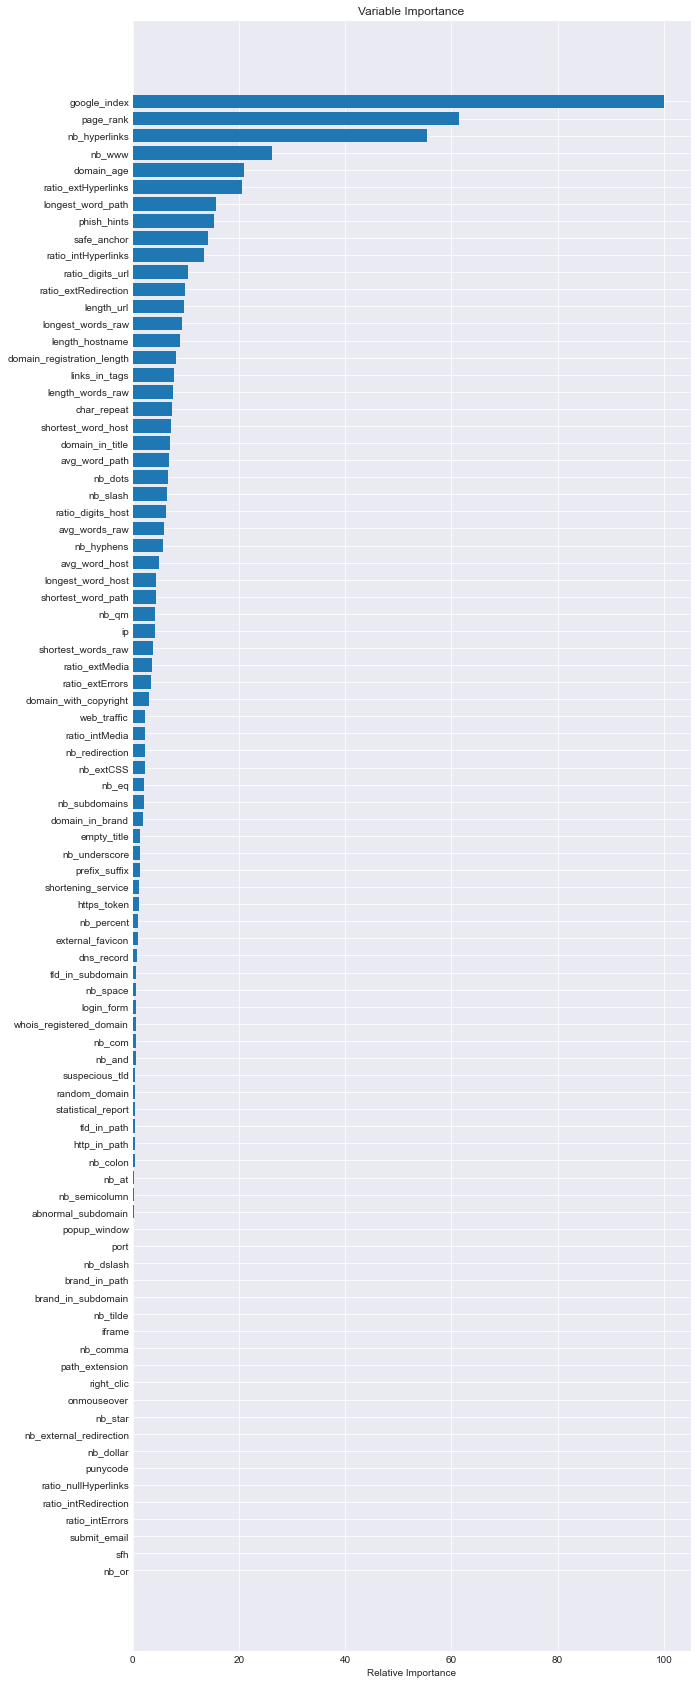

               feature  Relative importance
0  ratio_intHyperlinks            13.429493
1          safe_anchor            14.197431
2          phish_hints            15.377891
3    longest_word_path            15.710238
4  ratio_extHyperlinks            20.680757
5           domain_age            21.030088
6               nb_www            26.279931
7        nb_hyperlinks            55.370345
8            page_rank            61.408937
9         google_index           100.000000


In [53]:
#random forest is the best model
#feature importance
feature_importance = random_forest.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
#87 features, large figure
plt.figure(figsize=(10,30))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

#print the most important features
important_features = X.columns[sorted_idx][-10:]
#dataframe of the most important features with their importance percentage
important_features_df = pd.DataFrame({'feature': important_features, 'Relative importance': feature_importance[sorted_idx][-10:]})
print(important_features_df)


In [54]:
#since the random forest model has the highest accuracy we will use it to make predictions
#and save the model
import joblib
joblib.dump(random_forest, 'phishing_model.pkl')
#load the model
model = joblib.load('phishing_model.pkl')
#make predictions
predictions = model.predict(X_test)
print(predictions)


[-1. -1. -1. ...  1. -1.  1.]


[1 1 1 1 1 1 1 1 1 1]


In [ ]:
#

# Ensemble Learning

In [55]:
#using Ensemble Learning
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[('zeroR',zero_r),('logreg', logreg), ('svc', svc), ('gaussian', gaussian), ('perceptron', perceptron), ('linear_svc', linear_svc), ('sgd', sgd), ('decision_tree', decision_tree), ('random_forest', random_forest)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)



0.9615048118985127

##### So random forest accuracy is better than ensemble learning

In [56]:
#using bagging
from sklearn.ensemble import BaggingClassifier
#instantiate a BaggingClassifier
bagging = BaggingClassifier(RandomForestClassifier(), max_samples=0.5, max_features=0.5)
#fit to the training data
bagging.fit(X_train, y_train)
#test our model on the test data
bagging.score(X_test, y_test)


0.9615048118985127

In [57]:
#using boosting
from sklearn.ensemble import AdaBoostClassifier
#instantiate a AdaBoostClassifier
adaboost = AdaBoostClassifier(RandomForestClassifier(), n_estimators=5)
#fit to the training data
adaboost.fit(X_train, y_train)
#test our model on the test data
adaboost.score(X_test, y_test)


0.9667541557305337

Now We want to find the best hyperparameters for the random forest model.


In [61]:
#Random Forest hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
#best parameters
print(f'Best parameters: {grid_search.best_params_}')
#best estimator
print(f'Best estimator: {grid_search.best_estimator_}')
#best score
print(f'Best score: {grid_search.best_score_}')

#save the best model
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters: {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 300}
Best estimator: RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=300)
Best score: 0.9568022747156605


['best_model.pkl']